## Create results summary report for publication tables
- for each dataset and ML algorithm metric summary file...
- open associated metric file and calculate the average and standard devation of each set of 10 CV values
- Create summary files for each metric and save as individual excel files.
- Run statistical significance comparisons on metric results (non-parametric)

In [1]:
import os
import random
import copy
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # display all the columns
import scipy.stats as scs
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

#Statistics packages
from scipy import stats

#Plotting
import matplotlib.pyplot as plt

# Jupyter Notebook Hack: This code ensures that the results of multiple commands within a given cell are all displayed, rather than just the last. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Specify dataset specific paths
This should be the only section/cell in this notebook that is customized to the specific dataset. It may be necessary to change the names and paths to point this notebook to the 

In [31]:
#number
cv = 10

#unique dataset names
datasets = ['EpiOnly_20180710_Clean','Epi_DietAdj_20180710_Clean','Epi_DietAdj_Matched_20180710_Clean']

#algorithm names as specified in the respective analysis pipeline notebooks
algorithms = ['logistic_regression','decision_tree','random_forest','xgboost','naive_bayes','svm','ann','lcs']

results_path = 'C:/home/work/research_collab/Lynch_Bias_ML_Pancreatic/Final Materials/results/notebook_output/'

#import separate LCS analysis results
lcs_results_path = 'C:/home/work/research_collab/Lynch_Bias_ML_Pancreatic/Final Materials/results/summary_files/Whole_Datasets_200000/'

metrics = ['Accuracy','Balanced Accuracy','F1_Score','Precision','Recall','Specificity','TN','TP','FN','FP']


In [6]:
#Creating data frames to store all results summary.
tp_df = pd.DataFrame(index=algorithms,columns=datasets)
tn_df = pd.DataFrame(index=algorithms,columns=datasets)
fp_df = pd.DataFrame(index=algorithms,columns=datasets)
fn_df = pd.DataFrame(index=algorithms,columns=datasets)
acc_df = pd.DataFrame(index=algorithms,columns=datasets)
bacc_df = pd.DataFrame(index=algorithms,columns=datasets)
rec_df = pd.DataFrame(index=algorithms,columns=datasets) 
spec_df = pd.DataFrame(index=algorithms,columns=datasets)
prec_df = pd.DataFrame(index=algorithms,columns=datasets)
f1_df = pd.DataFrame(index=algorithms,columns=datasets)

#Store dataframes for later anlaysis

for data in datasets:
    for algorithm in algorithms:
        if algorithm != 'lcs': #Ignore LCS for now
            #Open corresponding results file
            filename = results_path+data+'_'+algorithm+'_metrics.csv'
            td = pd.read_csv(filename)

            #TP
            ave = td['TP'].mean()
            sd = td['TP'].mean()
            tp_df.at[algorithm, data] = str(round(ave,4))+' ('+str(round(sd,4))+')'

            #TN
            ave = td['TN'].mean()
            sd = td['TN'].mean()
            tn_df.at[algorithm, data] = str(round(ave,4))+' ('+str(round(sd,4))+')'

            #FP
            ave = td['FP'].mean()
            sd = td['FP'].mean()
            fp_df.at[algorithm, data] = str(round(ave,4))+' ('+str(round(sd,4))+')'

            #FN
            ave = td['FN'].mean()
            sd = td['FN'].mean()
            fn_df.at[algorithm, data] = str(round(ave,4))+' ('+str(round(sd,4))+')'    

            #Accuracy
            ave = td['Accuracy'].mean()
            sd = td['Accuracy'].mean()
            acc_df.at[algorithm, data] = str(round(ave,4))+' ('+str(round(sd,4))+')'    

            #Balanced Accuracy
            ave = td['Balanced Accuracy'].mean()
            sd = td['Balanced Accuracy'].mean()
            bacc_df.at[algorithm, data] = str(round(ave,4))+' ('+str(round(sd,4))+')'  

            #F1_Score
            ave = td['F1_Score'].mean()
            sd = td['F1_Score'].mean()
            f1_df.at[algorithm, data] = str(round(ave,4))+' ('+str(round(sd,4))+')'  

            #Precision
            ave = td['Precision'].mean()
            sd = td['Precision'].mean()
            prec_df.at[algorithm, data] = str(round(ave,4))+' ('+str(round(sd,4))+')'         

            #Recall
            ave = td['Recall'].mean()
            sd = td['Recall'].mean()
            rec_df.at[algorithm, data] = str(round(ave,4))+' ('+str(round(sd,4))+')'  

            #Specificity
            ave = td['Specificity'].mean()
            sd = td['Specificity'].mean()
            spec_df.at[algorithm, data] = str(round(ave,4))+' ('+str(round(sd,4))+')'  
        

### Load LCS metrics results
- create dictionary from LCS results- as metrics are not in same order
- these files also include an extra row with averages precalculated (we will ignore these here)

In [8]:
#update algorithms list
for data in datasets:
    LCSdata = ''
    if data == 'Epi_DietAdj_Matched_20180710_Clean':
        LCSdata = lcs_results_path+'ExSTraCS_2.0.2.1_'+data+'_InstLab_CV_M_200000_metric_summary.txt'
    else:
        LCSdata = lcs_results_path+'ExSTraCS_2.0.2.1_'+data+'_InstLab_200000_metric_summary.txt'
        
    td = pd.read_csv(LCSdata, sep = "\t")
    td.shape
    
    td = td.drop(td.index[-1])
    td.shape
    
    #TP
    ave = td['TP'].mean()
    sd = td['TP'].mean()
    tp_df.at['lcs', data] = str(round(ave,4))+' ('+str(round(sd,4))+')'

    #TN
    ave = td['TN'].mean()
    sd = td['TN'].mean()
    tn_df.at['lcs', data] = str(round(ave,4))+' ('+str(round(sd,4))+')'

    #FP
    ave = td['FP'].mean()
    sd = td['FP'].mean()
    fp_df.at['lcs', data] = str(round(ave,4))+' ('+str(round(sd,4))+')'

    #FN
    ave = td['FN'].mean()
    sd = td['FN'].mean()
    fn_df.at['lcs', data] = str(round(ave,4))+' ('+str(round(sd,4))+')'    

    #Accuracy
    ave = td['Accuracy'].mean()
    sd = td['Accuracy'].mean()
    acc_df.at['lcs', data] = str(round(ave,4))+' ('+str(round(sd,4))+')'    

    #Balanced Accuracy
    ave = td['BalancedAccuracy'].mean()
    sd = td['BalancedAccuracy'].mean()
    bacc_df.at['lcs', data] = str(round(ave,4))+' ('+str(round(sd,4))+')'  

    #F1_Score
    ave = td['F1'].mean()
    sd = td['F1'].mean()
    f1_df.at['lcs', data] = str(round(ave,4))+' ('+str(round(sd,4))+')'  

    #Precision
    ave = td['Precision'].mean()
    sd = td['Precision'].mean()
    prec_df.at['lcs', data] = str(round(ave,4))+' ('+str(round(sd,4))+')'         

    #Recall
    ave = td['Recall'].mean()
    sd = td['Recall'].mean()
    rec_df.at['lcs', data] = str(round(ave,4))+' ('+str(round(sd,4))+')'  

    #Specificity
    ave = td['Specificity'].mean()
    sd = td['Specificity'].mean()
    spec_df.at['lcs', data] = str(round(ave,4))+' ('+str(round(sd,4))+')'  

#rawMSScores = pd.read_csv(('C:/home/work/research_collab/Shannon_Lynch/PSB_Paper_Analysis/summary_files/MultiSURF_EpiOnly_20180710_Clean_results_summary.txt'), sep = "\t")

(11, 13)

(10, 13)

(11, 13)

(10, 13)

(11, 13)

(10, 13)

## Save individual stats summary files (per metric)

In [9]:
#TP
filepath = results_path+'Stats_TP.csv'
tp_df.to_csv(filepath)  

#TN
filepath = results_path+'Stats_TN.csv'
tn_df.to_csv(filepath)  

#FP
filepath = results_path+'Stats_FP.csv'
fp_df.to_csv(filepath)  

#FN
filepath = results_path+'Stats_FN.csv'
fn_df.to_csv(filepath)  

#Accuracy
filepath = results_path+'Stats_Accuracy.csv'
acc_df.to_csv(filepath)  

#Balanced Accuracy
filepath = results_path+'Stats_BAccuracy.csv'
bacc_df.to_csv(filepath)  

#Recall
filepath = results_path+'Stats_Recall.csv'
rec_df.to_csv(filepath)  

#Specificity
filepath = results_path+'Stats_Specificity.csv'
spec_df.to_csv(filepath)  

#Precision
filepath = results_path+'Stats_Precision.csv'
prec_df.to_csv(filepath)  

#F1 Score
filepath = results_path+'Stats_F1Score.csv'
f1_df.to_csv(filepath) 

## Statistical Significance comparisons
- completed within the context of a single metric at a time. 
- is there a performance difference between the ML's within a given dataset. (kruskal wallis test)
- is the best significantly different from second best (Mann-Whitnesy U test - i.e. Wilcoxon rank-sum test)

In [12]:
#Grab all balanced accuracy CV results over all analyses. 

d1_bacc = []
d2_bacc = []
d3_bacc = []

data_count = 0
for data in datasets:
    for algorithm in algorithms:
        if algorithm != 'lcs': #Ignore LCS for now
            #Open corresponding results file
            filename = results_path+data+'_'+algorithm+'_metrics.csv'
            td = pd.read_csv(filename)
            tdToList = td['Balanced Accuracy'].tolist() #Grab CV results for bacc
            
            if data_count == 0:
                d1_bacc.append(tdToList)
            elif data_count == 1:
                d2_bacc.append(tdToList)
            elif data_count == 2:
                d3_bacc.append(tdToList)
            else:
                print("error!!!!!")
                
    #Add in LCS
    LCSdata = ''
    if data == 'Epi_DietAdj_Matched_20180710_Clean':
        LCSdata = lcs_results_path+'ExSTraCS_2.0.2.1_'+data+'_InstLab_CV_M_200000_metric_summary.txt'
    else:
        LCSdata = lcs_results_path+'ExSTraCS_2.0.2.1_'+data+'_InstLab_200000_metric_summary.txt'
        
    td = pd.read_csv(LCSdata, sep = "\t")
    td = td.drop(td.index[-1])
    tdToList = td['BalancedAccuracy'].tolist() #Grab CV results for bacc
    
    if data_count == 0:
        d1_bacc.append(tdToList)
    elif data_count == 1:
        d2_bacc.append(tdToList)
    elif data_count == 2:
        d3_bacc.append(tdToList)
    else:
        print("error!!!!!")
    
                
    data_count += 1

## Kruskal Wallis Test (per dataset)

In [13]:
#Balanced Accuracy
print(datasets[0])
stats.kruskal(d1_bacc[0],d1_bacc[1],d1_bacc[2],d1_bacc[3],d1_bacc[4],d1_bacc[5],d1_bacc[6],d1_bacc[7])

print(datasets[1])
stats.kruskal(d2_bacc[0],d2_bacc[1],d2_bacc[2],d2_bacc[3],d2_bacc[4],d2_bacc[5],d2_bacc[6],d2_bacc[7])

print(datasets[2])
stats.kruskal(d3_bacc[0],d3_bacc[1],d3_bacc[2],d3_bacc[3],d3_bacc[4],d3_bacc[5],d3_bacc[6],d3_bacc[7])

EpiOnly_20180710_Clean


KruskalResult(statistic=57.34439352276202, pvalue=5.105699883503447e-10)

Epi_DietAdj_20180710_Clean


KruskalResult(statistic=66.96047135196164, pvalue=6.063992352649637e-12)

Epi_DietAdj_Matched_20180710_Clean


KruskalResult(statistic=19.399236766902266, pvalue=0.007024523838197663)

## Boxplot of Balanced accuracy over machine learners

Text(0.5, 1.0, 'EpiOnly_20180710_Clean')

Text(0, 0.5, 'Balanced Accuracy')

Text(0.5, 0, 'ML Algorithm')

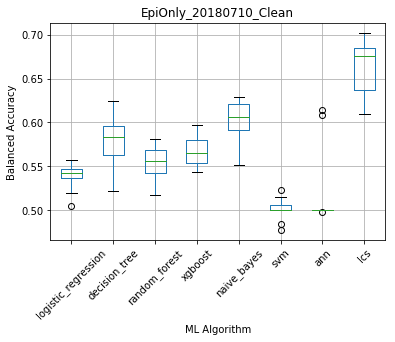

In [36]:
#Dataset 1
td1 = pd.DataFrame(d1_bacc)
td1 = td1.transpose()
td1.columns = algorithms

boxplot = td1.boxplot(column=algorithms,rot=45)
plt.title(datasets[0])
plt.ylabel('Balanced Accuracy')
plt.xlabel('ML Algorithm')
plt.savefig((results_path+'boxplot_' + datasets[0]), bbox_inches = "tight")
plt.show()

Text(0.5, 1.0, 'Epi_DietAdj_20180710_Clean')

Text(0, 0.5, 'Balanced Accuracy')

Text(0.5, 0, 'ML Algorithm')

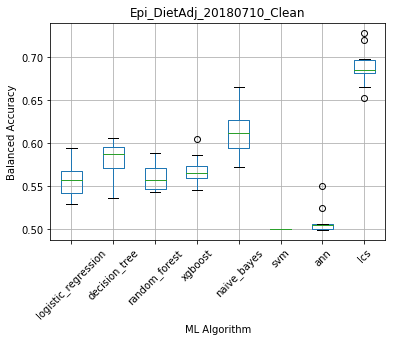

In [39]:
#Dataset 2
td2 = pd.DataFrame(d2_bacc)
td2 = td2.transpose()
td2.columns = algorithms

boxplot = td2.boxplot(column=algorithms,rot=45)
plt.title(datasets[1])
plt.ylabel('Balanced Accuracy')
plt.xlabel('ML Algorithm')
plt.savefig((results_path+'boxplot_' + datasets[1]), bbox_inches = "tight")
plt.show()

Text(0.5, 1.0, 'Epi_DietAdj_Matched_20180710_Clean')

Text(0, 0.5, 'Balanced Accuracy')

Text(0.5, 0, 'ML Algorithm')

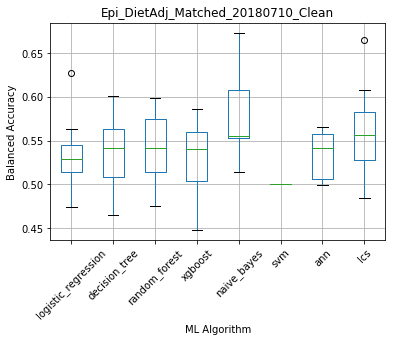

In [40]:
#Dataset 3
td3 = pd.DataFrame(d3_bacc)
td3 = td3.transpose()
td3.columns = algorithms

boxplot = td3.boxplot(column=algorithms,rot=45)
plt.title(datasets[2])
plt.ylabel('Balanced Accuracy')
plt.xlabel('ML Algorithm')
plt.savefig((results_path+'boxplot_' + datasets[2]), bbox_inches = "tight")
plt.show()

## Mann-Whitney U test (pairwise comparisons in dataset 1)

In [32]:
mann_stats = []
#Balanced Accuracy
for i in range(0,7):
    for j in range(i+1,8):
        
        set1 = d1_bacc[i]
        set2 = d1_bacc[j]
        print('Mann-WhitneyU: '+str(algorithms[i])+' vs. '+str(algorithms[j]))
        report = stats.mannwhitneyu(set1,set2)
        report
        tempstats = [algorithms[i], algorithms[j], report[0], report[1]]
        mann_stats.append(tempstats)

mann_stats_df = pd.DataFrame(mann_stats)
filepath = results_path+'Stats_'+str(datasets[0])+'_'+'BAccuracy_Mann.csv'
mann_stats_df.to_csv(filepath, header = ['Algorithm 1', 'Algorithm 2', 'statistic', 'p-value'], index = False)  

Mann-WhitneyU: logistic_regression vs. decision_tree


MannwhitneyuResult(statistic=8.0, pvalue=0.0008531246844597982)

Mann-WhitneyU: logistic_regression vs. random_forest


MannwhitneyuResult(statistic=26.0, pvalue=0.03783078607194352)

Mann-WhitneyU: logistic_regression vs. xgboost


MannwhitneyuResult(statistic=11.0, pvalue=0.0018052571561648014)

Mann-WhitneyU: logistic_regression vs. naive_bayes


MannwhitneyuResult(statistic=2.0, pvalue=0.00016491926038899677)

Mann-WhitneyU: logistic_regression vs. svm


MannwhitneyuResult(statistic=5.0, pvalue=0.00036693611077166983)

Mann-WhitneyU: logistic_regression vs. ann


MannwhitneyuResult(statistic=20.0, pvalue=0.011349172658687946)

Mann-WhitneyU: logistic_regression vs. lcs


MannwhitneyuResult(statistic=0.0, pvalue=9.133589555477501e-05)

Mann-WhitneyU: decision_tree vs. random_forest


MannwhitneyuResult(statistic=21.0, pvalue=0.015604506385870109)

Mann-WhitneyU: decision_tree vs. xgboost


MannwhitneyuResult(statistic=34.0, pvalue=0.12066079650859002)

Mann-WhitneyU: decision_tree vs. naive_bayes


MannwhitneyuResult(statistic=28.5, pvalue=0.05613775299027845)

Mann-WhitneyU: decision_tree vs. svm


MannwhitneyuResult(statistic=1.0, pvalue=0.00011656370347000333)

Mann-WhitneyU: decision_tree vs. ann


MannwhitneyuResult(statistic=18.0, pvalue=0.007488247878897449)

Mann-WhitneyU: decision_tree vs. lcs


MannwhitneyuResult(statistic=2.0, pvalue=0.00016491926038899677)

Mann-WhitneyU: random_forest vs. xgboost


MannwhitneyuResult(statistic=30.5, pvalue=0.07538666892672001)

Mann-WhitneyU: random_forest vs. naive_bayes


MannwhitneyuResult(statistic=9.0, pvalue=0.0011011099712485391)

Mann-WhitneyU: random_forest vs. svm


MannwhitneyuResult(statistic=1.0, pvalue=0.00011656370347000333)

Mann-WhitneyU: random_forest vs. ann


MannwhitneyuResult(statistic=20.0, pvalue=0.011349172658687946)

Mann-WhitneyU: random_forest vs. lcs


MannwhitneyuResult(statistic=0.0, pvalue=9.133589555477501e-05)

Mann-WhitneyU: xgboost vs. naive_bayes


MannwhitneyuResult(statistic=15.0, pvalue=0.004554248199015482)

Mann-WhitneyU: xgboost vs. svm


MannwhitneyuResult(statistic=0.0, pvalue=8.632699844113366e-05)

Mann-WhitneyU: xgboost vs. ann


MannwhitneyuResult(statistic=20.0, pvalue=0.011349172658687946)

Mann-WhitneyU: xgboost vs. lcs


MannwhitneyuResult(statistic=0.0, pvalue=9.133589555477501e-05)

Mann-WhitneyU: naive_bayes vs. svm


MannwhitneyuResult(statistic=0.0, pvalue=8.632699844113366e-05)

Mann-WhitneyU: naive_bayes vs. ann


MannwhitneyuResult(statistic=12.0, pvalue=0.0018875627844461226)

Mann-WhitneyU: naive_bayes vs. lcs


MannwhitneyuResult(statistic=8.0, pvalue=0.0008531246844597982)

Mann-WhitneyU: svm vs. ann


MannwhitneyuResult(statistic=50.0, pvalue=0.48349933325334177)

Mann-WhitneyU: svm vs. lcs


MannwhitneyuResult(statistic=0.0, pvalue=8.632699844113366e-05)

Mann-WhitneyU: ann vs. lcs


MannwhitneyuResult(statistic=2.0, pvalue=0.00012187941007626433)

## Mann-Whitney U test (pairwise comparisons in dataset 2)

In [33]:
mann_stats = []
#Balanced Accuracy
for i in range(0,7):
    for j in range(i+1,8):
        
        set1 = d2_bacc[i]
        set2 = d2_bacc[j]
        print('Mann-WhitneyU: '+str(algorithms[i])+' vs. '+str(algorithms[j]))
        report = stats.mannwhitneyu(set1,set2)
        report
        tempstats = [algorithms[i], algorithms[j], report[0], report[1]]
        mann_stats.append(tempstats)

mann_stats_df = pd.DataFrame(mann_stats)
filepath = results_path+'Stats_'+str(datasets[1])+'_'+'BAccuracy_Mann.csv'
mann_stats_df.to_csv(filepath, header = ['Algorithm 1', 'Algorithm 2', 'statistic', 'p-value'], index = False)   

Mann-WhitneyU: logistic_regression vs. decision_tree


MannwhitneyuResult(statistic=18.0, pvalue=0.008607768731307903)

Mann-WhitneyU: logistic_regression vs. random_forest


MannwhitneyuResult(statistic=41.0, pvalue=0.26026144163788634)

Mann-WhitneyU: logistic_regression vs. xgboost


MannwhitneyuResult(statistic=32.0, pvalue=0.09293836618293788)

Mann-WhitneyU: logistic_regression vs. naive_bayes


MannwhitneyuResult(statistic=3.0, pvalue=0.00021981937631328227)

Mann-WhitneyU: logistic_regression vs. svm


MannwhitneyuResult(statistic=0.0, pvalue=3.193222375218491e-05)

Mann-WhitneyU: logistic_regression vs. ann


MannwhitneyuResult(statistic=4.0, pvalue=0.00028864501379232104)

Mann-WhitneyU: logistic_regression vs. lcs


MannwhitneyuResult(statistic=0.0, pvalue=9.133589555477501e-05)

Mann-WhitneyU: decision_tree vs. random_forest


MannwhitneyuResult(statistic=22.0, pvalue=0.018781735942949195)

Mann-WhitneyU: decision_tree vs. xgboost


MannwhitneyuResult(statistic=26.0, pvalue=0.0377757927648433)

Mann-WhitneyU: decision_tree vs. naive_bayes


MannwhitneyuResult(statistic=18.0, pvalue=0.008607768731307903)

Mann-WhitneyU: decision_tree vs. svm


MannwhitneyuResult(statistic=0.0, pvalue=3.1701437086470106e-05)

Mann-WhitneyU: decision_tree vs. ann


MannwhitneyuResult(statistic=1.0, pvalue=0.0001210868928692622)

Mann-WhitneyU: decision_tree vs. lcs


MannwhitneyuResult(statistic=0.0, pvalue=9.082557304573249e-05)

Mann-WhitneyU: random_forest vs. xgboost


MannwhitneyuResult(statistic=36.0, pvalue=0.15374472830934066)

Mann-WhitneyU: random_forest vs. naive_bayes


MannwhitneyuResult(statistic=4.0, pvalue=0.00029141997158963715)

Mann-WhitneyU: random_forest vs. svm


MannwhitneyuResult(statistic=0.0, pvalue=3.193222375218491e-05)

Mann-WhitneyU: random_forest vs. ann


MannwhitneyuResult(statistic=3.0, pvalue=0.0002176393852588628)

Mann-WhitneyU: random_forest vs. lcs


MannwhitneyuResult(statistic=0.0, pvalue=9.133589555477501e-05)

Mann-WhitneyU: xgboost vs. naive_bayes


MannwhitneyuResult(statistic=7.0, pvalue=0.0006574723348566069)

Mann-WhitneyU: xgboost vs. svm


MannwhitneyuResult(statistic=0.0, pvalue=3.193222375218491e-05)

Mann-WhitneyU: xgboost vs. ann


MannwhitneyuResult(statistic=1.0, pvalue=0.00012174335714866438)

Mann-WhitneyU: xgboost vs. lcs


MannwhitneyuResult(statistic=0.0, pvalue=9.133589555477501e-05)

Mann-WhitneyU: naive_bayes vs. svm


MannwhitneyuResult(statistic=0.0, pvalue=3.193222375218491e-05)

Mann-WhitneyU: naive_bayes vs. ann


MannwhitneyuResult(statistic=0.0, pvalue=9.031736040376755e-05)

Mann-WhitneyU: naive_bayes vs. lcs


MannwhitneyuResult(statistic=2.0, pvalue=0.00016491926038899677)

Mann-WhitneyU: svm vs. ann


MannwhitneyuResult(statistic=30.0, pvalue=0.04800036248142131)

Mann-WhitneyU: svm vs. lcs


MannwhitneyuResult(statistic=0.0, pvalue=3.193222375218491e-05)

Mann-WhitneyU: ann vs. lcs


MannwhitneyuResult(statistic=0.0, pvalue=9.031736040376755e-05)

## Mann-Whitney U test (pairwise comparisons in dataset 3)

In [34]:
mann_stats = []
#Balanced Accuracy
for i in range(0,7):
    for j in range(i+1,8):
        
        set1 = d3_bacc[i]
        set2 = d3_bacc[j]
        print('Mann-WhitneyU: '+str(algorithms[i])+' vs. '+str(algorithms[j]))
        report = stats.mannwhitneyu(set1,set2)
        report
        tempstats = [algorithms[i], algorithms[j], report[0], report[1]]
        mann_stats.append(tempstats)

mann_stats_df = pd.DataFrame(mann_stats)
filepath = results_path+'Stats_'+str(datasets[2])+'_'+'BAccuracy_Mann.csv'
mann_stats_df.to_csv(filepath, header = ['Algorithm 1', 'Algorithm 2', 'statistic', 'p-value'], index = False)

Mann-WhitneyU: logistic_regression vs. decision_tree


MannwhitneyuResult(statistic=45.0, pvalue=0.3668649978481236)

Mann-WhitneyU: logistic_regression vs. random_forest


MannwhitneyuResult(statistic=43.0, pvalue=0.3115881119410587)

Mann-WhitneyU: logistic_regression vs. xgboost


MannwhitneyuResult(statistic=47.0, pvalue=0.42505336956926293)

Mann-WhitneyU: logistic_regression vs. naive_bayes


MannwhitneyuResult(statistic=22.0, pvalue=0.01881765689365712)

Mann-WhitneyU: logistic_regression vs. svm


MannwhitneyuResult(statistic=10.0, pvalue=0.0007104559900512436)

Mann-WhitneyU: logistic_regression vs. ann


MannwhitneyuResult(statistic=46.0, pvalue=0.3956300532015894)

Mann-WhitneyU: logistic_regression vs. lcs


MannwhitneyuResult(statistic=34.0, pvalue=0.12066079650859002)

Mann-WhitneyU: decision_tree vs. random_forest


MannwhitneyuResult(statistic=45.5, pvalue=0.3811410627931685)

Mann-WhitneyU: decision_tree vs. xgboost


MannwhitneyuResult(statistic=48.0, pvalue=0.45486094457277765)

Mann-WhitneyU: decision_tree vs. naive_bayes


MannwhitneyuResult(statistic=24.0, pvalue=0.026951278584693587)

Mann-WhitneyU: decision_tree vs. svm


MannwhitneyuResult(statistic=20.0, pvalue=0.008593546960647971)

Mann-WhitneyU: decision_tree vs. ann


MannwhitneyuResult(statistic=46.0, pvalue=0.3956300532015894)

Mann-WhitneyU: decision_tree vs. lcs


MannwhitneyuResult(statistic=36.0, pvalue=0.15374472830934066)

Mann-WhitneyU: random_forest vs. xgboost


MannwhitneyuResult(statistic=41.0, pvalue=0.26026144163788634)

Mann-WhitneyU: random_forest vs. naive_bayes


MannwhitneyuResult(statistic=27.0, pvalue=0.04448650585090664)

Mann-WhitneyU: random_forest vs. svm


MannwhitneyuResult(statistic=20.0, pvalue=0.008593546960647971)

Mann-WhitneyU: random_forest vs. ann


MannwhitneyuResult(statistic=43.0, pvalue=0.3115227654189539)

Mann-WhitneyU: random_forest vs. lcs


MannwhitneyuResult(statistic=42.0, pvalue=0.28537519402908695)

Mann-WhitneyU: xgboost vs. naive_bayes


MannwhitneyuResult(statistic=27.0, pvalue=0.04448650585090664)

Mann-WhitneyU: xgboost vs. svm


MannwhitneyuResult(statistic=30.0, pvalue=0.057629106798727014)

Mann-WhitneyU: xgboost vs. ann


MannwhitneyuResult(statistic=49.0, pvalue=0.4849193207024165)

Mann-WhitneyU: xgboost vs. lcs


MannwhitneyuResult(statistic=36.0, pvalue=0.15374472830934066)

Mann-WhitneyU: naive_bayes vs. svm


MannwhitneyuResult(statistic=0.0, pvalue=3.193222375218491e-05)

Mann-WhitneyU: naive_bayes vs. ann


MannwhitneyuResult(statistic=24.0, pvalue=0.026906183006072715)

Mann-WhitneyU: naive_bayes vs. lcs


MannwhitneyuResult(statistic=38.0, pvalue=0.19233653136775436)

Mann-WhitneyU: svm vs. ann


MannwhitneyuResult(statistic=20.0, pvalue=0.0059183943997769585)

Mann-WhitneyU: svm vs. lcs


MannwhitneyuResult(statistic=10.0, pvalue=0.0007104559900512436)

Mann-WhitneyU: ann vs. lcs


MannwhitneyuResult(statistic=34.0, pvalue=0.12057231310804212)